# Apple Stock Prediction (Ticker: AAPL)

Using Linear Regression Technique

Team:
    Hoang Thu Thao Nguyen; 
    Kishan Kanubhai Patel; 
    Gaurav Bhalchandra Akrekar


In [8]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
%matplotlib inline

In [10]:
#Import dataset

df = pd.read_csv("AAPL.csv")

Dataset collected from Kaggle
https://www.kaggle.com/datasets/varpit94/apple-stock-data-updated-till-22jun2021/version/1?resource=download

# Data Understanding and Data Preparation

In [13]:
#First 10 rows
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098999,48630400
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103817,37363200
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.108198,46950400
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113892,48003200
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.124405,55574400


In [15]:
#last 10 rows
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
10208,2021-06-09,127.209999,127.750000,126.519997,127.129997,127.129997,56877900
10209,2021-06-10,127.019997,128.190002,125.940002,126.110001,126.110001,71186400
10210,2021-06-11,126.529999,127.440002,126.099998,127.349998,127.349998,53522400
10211,2021-06-14,127.820000,130.539993,127.070000,130.479996,130.479996,96906500
10212,2021-06-15,129.940002,130.600006,129.389999,129.639999,129.639999,62746300
10213,2021-06-16,130.369995,130.889999,128.460007,130.149994,130.149994,91815000
10214,2021-06-17,129.800003,132.550003,129.649994,131.789993,131.789993,96721700
10215,2021-06-18,130.710007,131.509995,130.240005,130.460007,130.460007,108787300
10216,2021-06-21,130.300003,132.410004,129.210007,132.300003,132.300003,79663300
10217,2021-06-22,132.130005,134.080002,131.619995,133.979996,133.979996,74679000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10218 entries, 0 to 10217
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10218 non-null  object 
 1   Open       10218 non-null  float64
 2   High       10218 non-null  float64
 3   Low        10218 non-null  float64
 4   Close      10218 non-null  float64
 5   Adj Close  10218 non-null  float64
 6   Volume     10218 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 558.9+ KB


In [17]:
#check how many values are missing (NaN) before we apply the methods belo
count_nan = df.isnull().sum() #the number of missing values of every colu
print(count_nan[count_nan > 0])

Series([], dtype: int64)


In [18]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#no NaN values; no need to fill missing values

In [21]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Exploratory  Data Analysis (EDA)

Installing plotly

In [22]:
pip install plotly

In [23]:
pip list | grep plotly

Note: you may need to restart the kernel to use updated packages.


'grep' is not recognized as an internal or external command,
operable program or batch file.


Creating Candlestick graph for EDA.
The candlestick graph has rangeslider 
    that stakeholders can view any period of time
    from 1980 to 2021.

In [70]:
#import graph objects and chart studio

import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
figure_candlestick = go.Figure(data=[go.Candlestick(x=df['Date'],
                                                 open=df['Open'],
                                                 high=df['High'],
                                                 low=df['Low'],
                                                 close=df['Close'])])
figure_candlestick.update_layout(title='Apple Stock Price History', 
                     yaxis_title='AAPL Price (USD)')
figure_candlestick.show()

Line Chart showing close price from 1980 to 2021

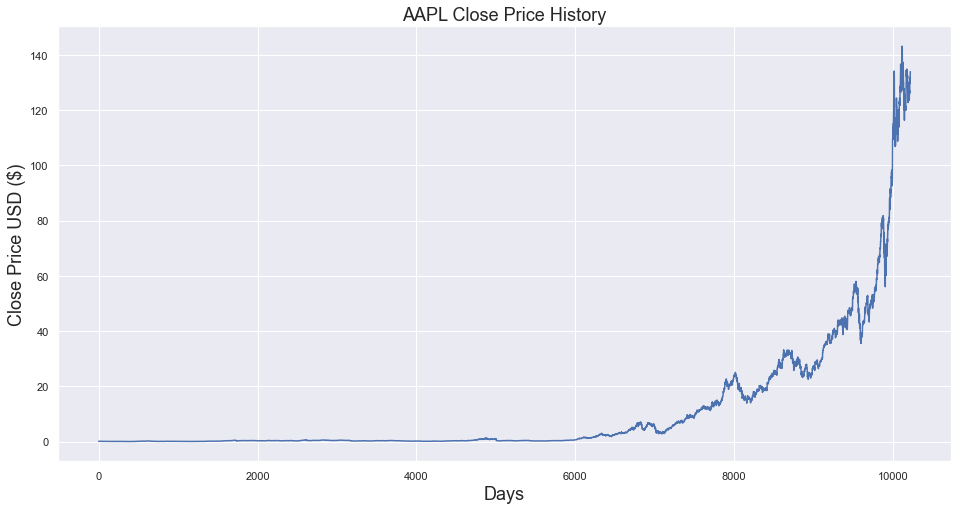

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(16, 8))
plt.title("AAPL Close Price History", fontsize = 18)
plt.xlabel("Days", fontsize = 18)
plt.ylabel("Close Price USD ($)", fontsize = 18)
plt.plot(df["Close"])
plt.show()
#running through all 10217 days

# Ploting distplot to compare volume and density; open price and density; close price and density

C:\Users\thaoh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



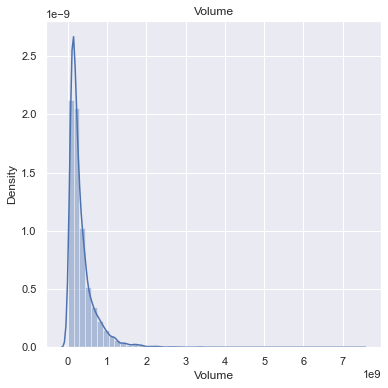

In [34]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Volume'])
plt.title('Volume')
plt.show()

C:\Users\thaoh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



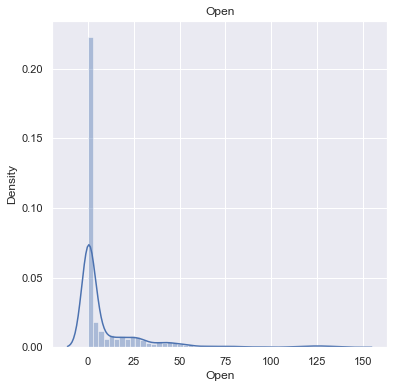

In [35]:
plt.figure(figsize=(6,6))
sns.distplot(df['Open'])
plt.title('Open')
plt.show()

C:\Users\thaoh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



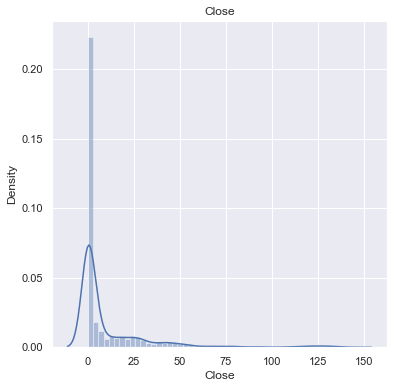

In [36]:
plt.figure(figsize=(6,6))
sns.distplot(df['Close'])
plt.title('Close')
plt.show()

# Creating new dataframe to start Linear Regression Model

In [41]:
new_df = df
new_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600


Creating new dataframe that drop column 'Close','Date','Adj Close'.

Dropping 'Close' variable because it is our target variable. 'Open', 'High', 'Low', 'Volume' are independent variables.

Dropping 'Date', 'Adj Close' because we chose to ignore these 2 variables for better prediction.

Adj Closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. The closing price is the raw price, which is just the cash value of the last transacted price before the market closes.

In [42]:
new_df = new_df.drop(columns='Close', axis=1)
new_df = new_df.drop(columns='Date', axis=1)
new_df = new_df.drop(columns='Adj Close', axis=1)

In [43]:
new_df

,Open,High,Low,Volume
0,0.128348,0.128906,0.128348,469033600
1,0.122210,0.122210,0.121652,175884800
2,0.113281,0.113281,0.112723,105728000
3,0.115513,0.116071,0.115513,86441600
4,0.118862,0.119420,0.118862,73449600
...,...,...,...,...
10213,130.369995,130.889999,128.460007,91815000
10214,129.800003,132.550003,129.649994,96721700
10215,130.710007,131.509995,130.240005,108787300
10216,130.300003,132.410004,129.210007,79663300


In [46]:
#defining new_df with 'Open', 'High', 'Low', 'Volume' as independent variables
#defining 'Close' price as target variable

X = new_df
Y = df['Close']

# Split dataset into train dataset and test dataset wth 80:20 ratio.
Linear Regression Model starts

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state = 101)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(10218, 4) (8174, 4) (2044, 4)


In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
# loading the Linear Regression model
regressor = LinearRegression()

In [52]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [53]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [55]:
correlation_matrix = np.corrcoef(Y_train, training_data_prediction)

print(correlation_matrix)
correlation_xy = correlation_matrix[0,1]

print(correlation_xy)
r_squared = correlation_xy**2

print(r_squared)

[[1.         0.99996614]
 [0.99996614 1.        ]]
0.9999661375954508
0.9999322763375641


R squared value is 0.9999322763375641

The standards for a good R-Squared: ≥ 0.9 

In finance: 

R-Squared ≥ 0.7 : a high level of correlation 

R-Squared < 0.4 : a low correlation.


# Predicting 'Close' price 

In [60]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600


In [61]:
import joblib
joblib.dump(regressor, 'mymodel.pkl')

['mymodel.pkl']

In [64]:
import joblib
load_regressor = joblib.load('mymodel.pkl')

Let's test row 2 to see if Linear Regression Model predicts 'Close' price nearly accurate to the dataset

If 'Close' price is close to 0.112723. Accuracy is high

In [68]:
input_data = (0.113281,0.113281,0.112723,105728000)
# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = load_regressor.predict(input_data_reshaped)
# print(prediction)
print('Prediction of Close is ', prediction)

Prediction of Close is  [0.11264696]


C:\Users\thaoh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Actual price was 0.112723, and Prediction price is 0.11264696

# End